#Spaceship Titanic

It's 2912. We have received a distress call from the tragic Spaceship Titanic, a massive interplanetary ship that was transporting immigrants to new worlds. The Spaceship Titanic, in contrast to its 20th-century eponym, did not capsize. But then there was a terrifying twist brought about by an unexplained spacetime anomaly close to Alpha Centauri: over half of the passengers disappeared, possibly taken to another dimension! <br>Our goal is to take advantage of machine learning and the transmitted passenger data and identify patterns that differentiate between the people who strangely transferred themselves and the people who stayed on board using classification techniques. By analyzing factors such as travel destinations, passenger demographics, and any potential readings from the anomaly itself, we can build a model that predicts the likelihood of a passenger being transported.

##Adding necessary tools

first we need to upload kaggle dataset using API command without uploading it manually.

note: you need to upload kaggle.json in order to successfully run next cell<br>
check [this notebook](https://github.com/MeysamAgah/Guides/blob/main/Load_Kaggle_datasets_to_Colab.ipynb) for loading kaggle datasets to colab

note: you need to run this at google colab

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'spaceship-titanic'
!mkdir spaceship-titanic
!unzip 'spaceship-titanic.zip' -d /content/spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 85.5MB/s]
Archive:  spaceship-titanic.zip
  inflating: /content/spaceship-titanic/sample_submission.csv  
  inflating: /content/spaceship-titanic/test.csv  
  inflating: /content/spaceship-titanic/train.csv  


Now we add necessary tools and modules

In [2]:
## basic modules
import pandas as pd #for data analysis and manipulation
import numpy as np #for numerical computations
from matplotlib import pyplot as plt #visualization
import seaborn as sns #visualization

## preprocessing step
from sklearn.preprocessing import StandardScaler #Scaling values
from sklearn.model_selection import train_test_split #splitting dataset to train and test

## classification models
from sklearn.linear_model import LogisticRegression #Logistic Regression implementation
from sklearn.neighbors import KNeighborsClassifier #Knearestneighbors implementation
from sklearn.svm import SVC #Support Vector Machine implementation
from sklearn.tree import DecisionTreeClassifier #Decision Tree implementation
from sklearn.ensemble import RandomForestClassifier #Random Forest implementation
from sklearn.ensemble import AdaBoostClassifier #AdaBoost implementation
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting implementation
from sklearn.ensemble import HistGradientBoostingClassifier #histogram based gradient implementation
from xgboost import XGBClassifier #XGboost implementation

## regression models
from xgboost import XGBRegressor #XGBregressor for imputing numerical columns

## evaluating models
from sklearn.metrics import accuracy_score #calculate accuracy of classification models
from sklearn.metrics import r2_score #calculate accuracy of Regression models
from sklearn.metrics import classification_report #gives us recall, precision and f1-score
from sklearn.metrics import confusion_matrix #gives us better visualization about accuracy of classification model
from sklearn.metrics import ConfusionMatrixDisplay #display confusion matrix

##Exploratory Data Analysis (EDA)

Before diving into complex models and algorithms, it's crucial to gain a solid understanding of the data we're working with. This initial exploration is what we call Exploratory Data Analysis (EDA). Through EDA, we aim to uncover the key characteristics, patterns, and potential issues within our dataset.<br>
for this process first we understand data then we check for missing values, then chech for feature engineering and then visualization of data and correlation between them.

### import

let's import dataset

In [3]:
#reading dataset
df = pd.read_csv('/content/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Analyze

Let's understand more about data.

In [4]:
#dimension of data
df.shape

(8693, 14)

In [5]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#summary statistics for numeric columns
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
#list of columns
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [8]:
#number of unique values for each feature
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [9]:
#checking types of each column
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Data Cleaning

In [10]:
#removing unnecessary features
cols_to_del = ['PassengerId', 'Cabin', 'Name']
df = df.drop(columns=cols_to_del)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Visualization

#### Univariate

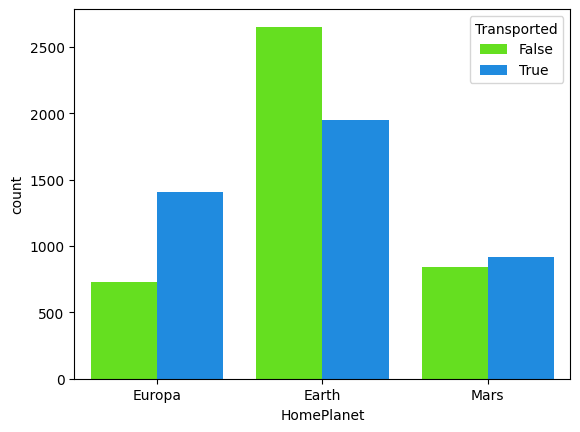

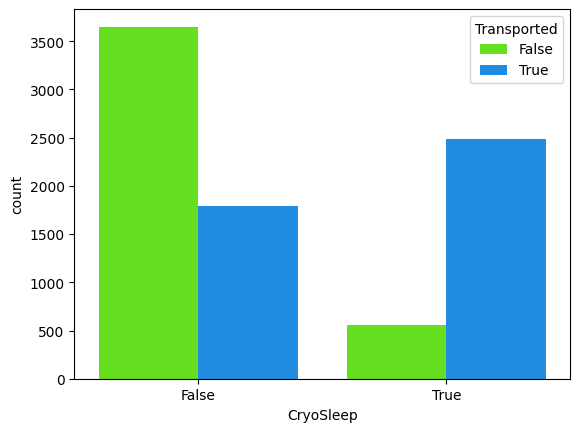

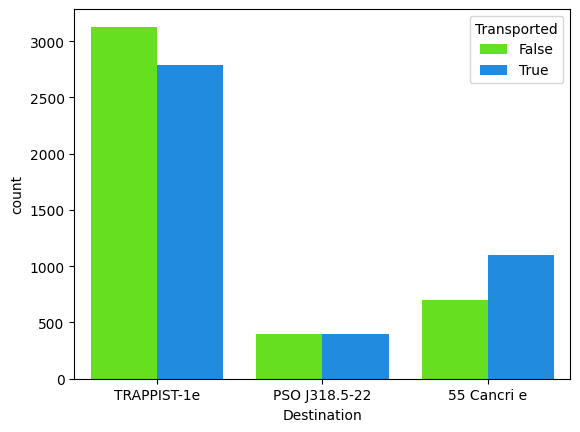

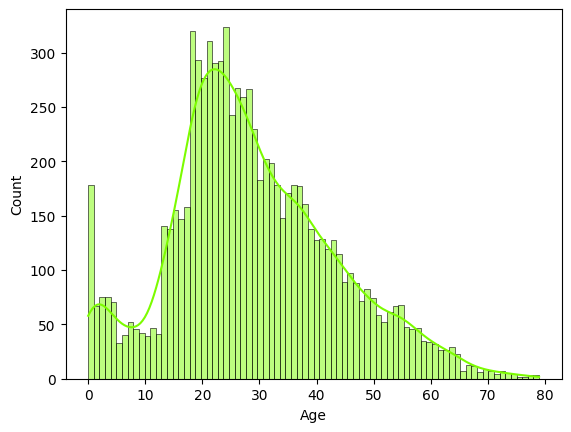

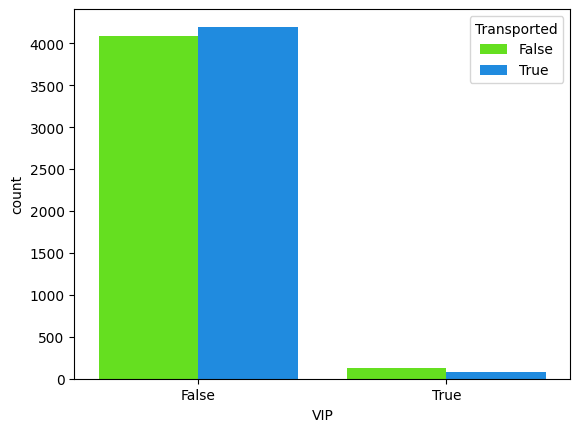

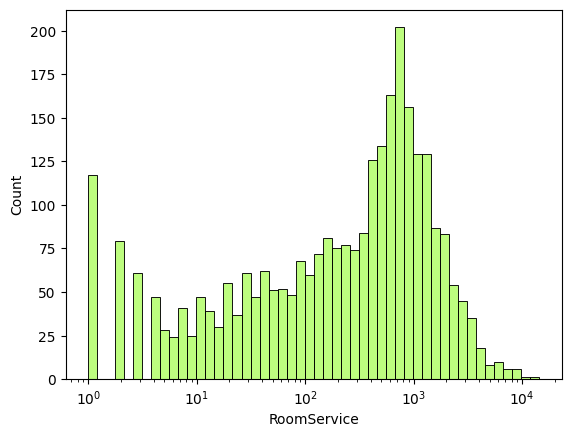

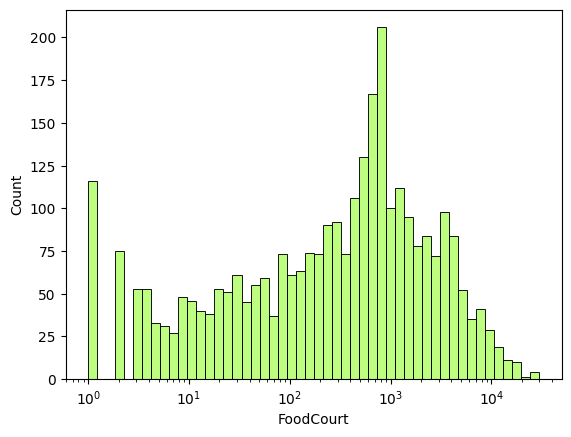

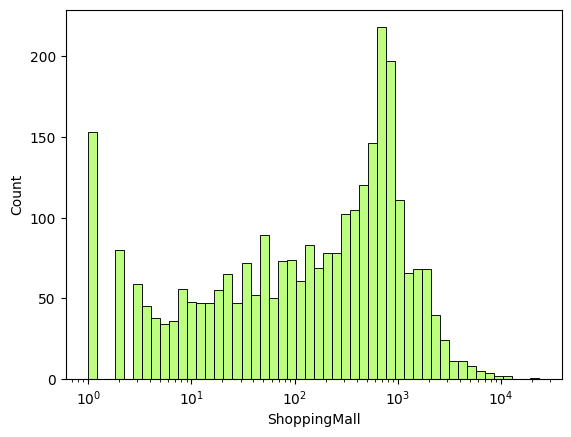

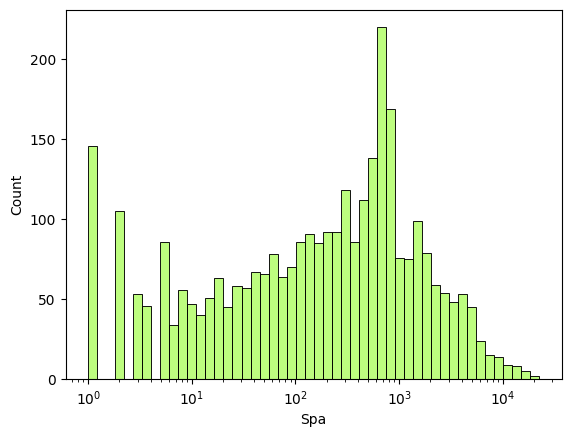

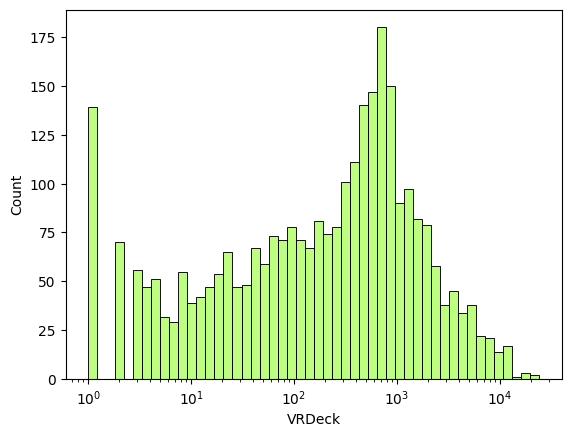

In [11]:
for i in df.columns.tolist():
  if df[i].dtypes == 'object':
    sns.countplot(data = df, x = i,hue="Transported" , palette='gist_rainbow')
    plt.show()
  elif df[i].dtypes == 'float64':
    if i == 'Age':
      sns.histplot(data = df, x = i, color='lawngreen', bins=80, kde=True)
      plt.show()
    else:
      sns.histplot(data = df, x = i, color='lawngreen', bins=50, kde=True, log_scale = 10)
      plt.show()

Transported

<ipython-input-12-7b0719df2b2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Transported' , palette='gist_rainbow')


<Axes: xlabel='Transported', ylabel='count'>

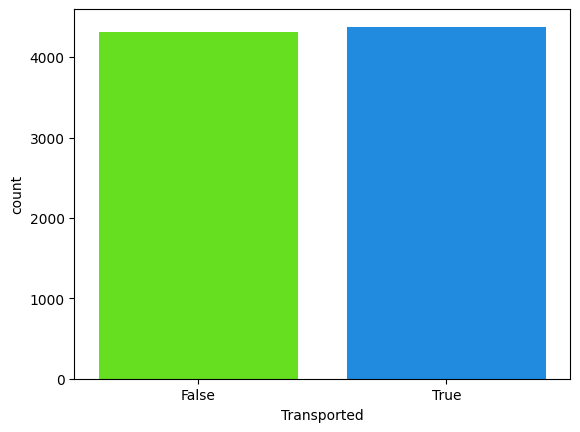

In [12]:
sns.countplot(data = df, x = 'Transported' , palette='gist_rainbow')

####Bivariate

Age VS FoodCourt

<Axes: xlabel='Age', ylabel='FoodCourt'>

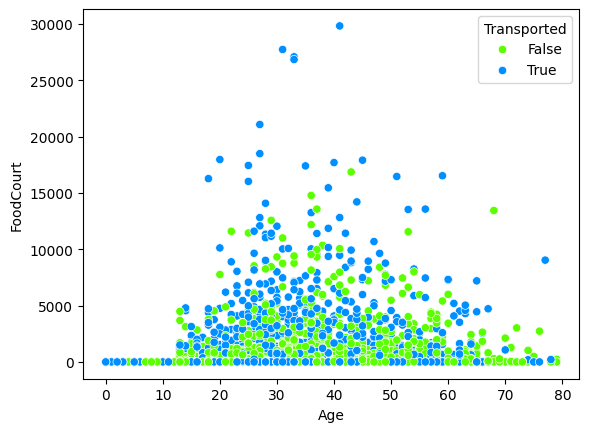

In [13]:
sns.scatterplot(data=df, x='Age', y='FoodCourt', hue='Transported', palette='gist_rainbow')

Age VS Spa

<Axes: xlabel='Age', ylabel='Spa'>

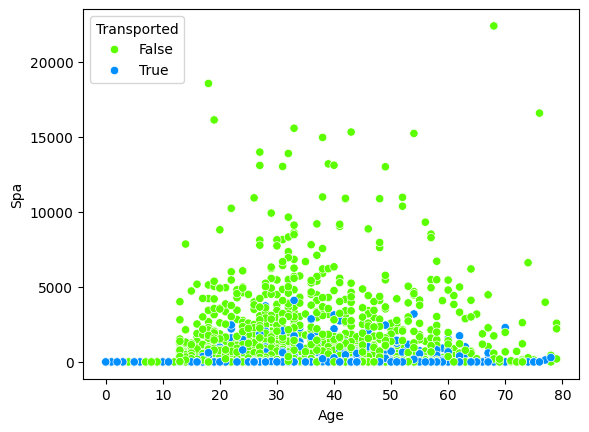

In [14]:
sns.scatterplot(data=df, x='Age', y='Spa', hue='Transported', palette='gist_rainbow')

Age VS VRDeck

<Axes: xlabel='Age', ylabel='VRDeck'>

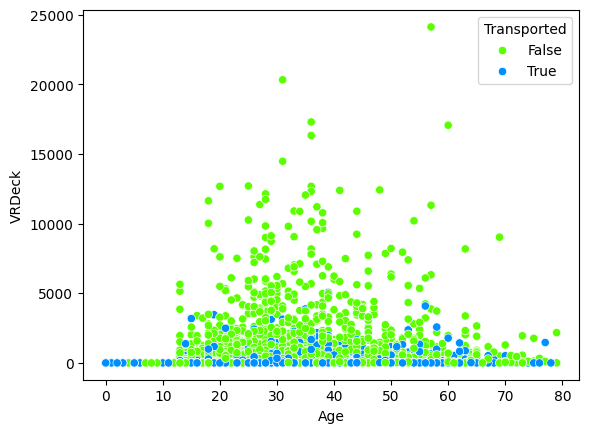

In [15]:
sns.scatterplot(data=df, x='Age', y='VRDeck', hue='Transported', palette='gist_rainbow')

FoodCourt VS Spa

<Axes: xlabel='FoodCourt', ylabel='Spa'>

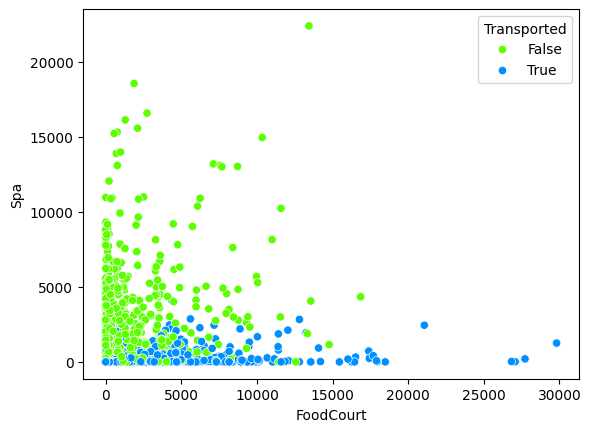

In [16]:
sns.scatterplot(data=df, x='FoodCourt', y='Spa', hue='Transported', palette='gist_rainbow')

FoodCourt VS VRDeck

<Axes: xlabel='FoodCourt', ylabel='VRDeck'>

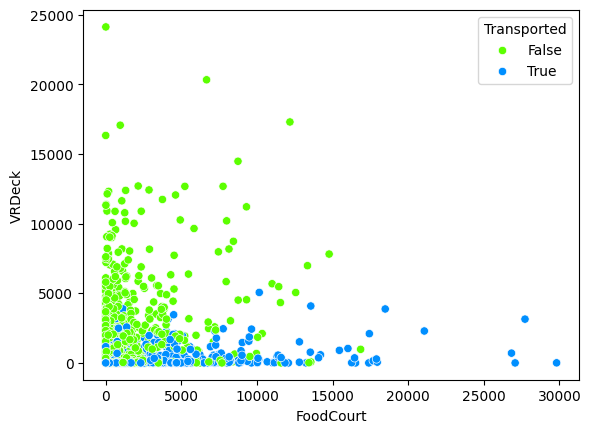

In [17]:
sns.scatterplot(data=df, x='FoodCourt', y='VRDeck', hue='Transported', palette='gist_rainbow')

Spa VS VRDeck

<Axes: xlabel='Spa', ylabel='VRDeck'>

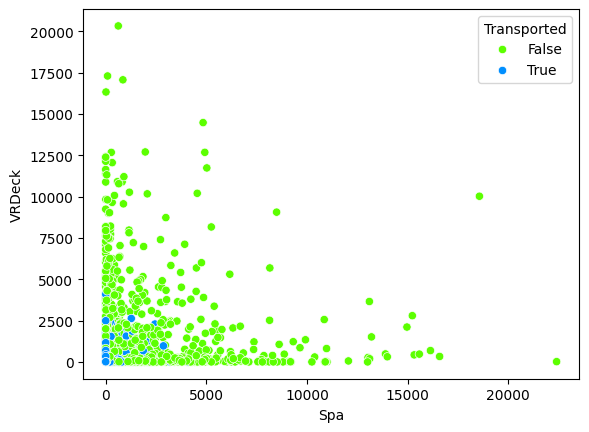

In [18]:
sns.scatterplot(data=df, x='Spa', y='VRDeck', hue='Transported', palette='gist_rainbow')

Home Planet VS CryoSleep

<Axes: xlabel='HomePlanet', ylabel='count'>

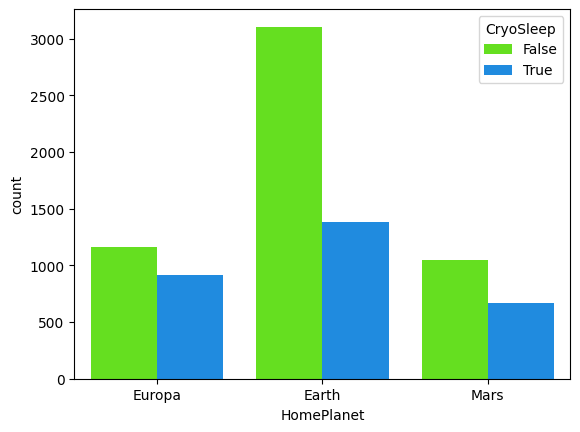

In [19]:
sns.countplot(data = df, x = 'HomePlanet',hue="CryoSleep" , palette='gist_rainbow')

Home Planet VS Destination

<Axes: xlabel='HomePlanet', ylabel='count'>

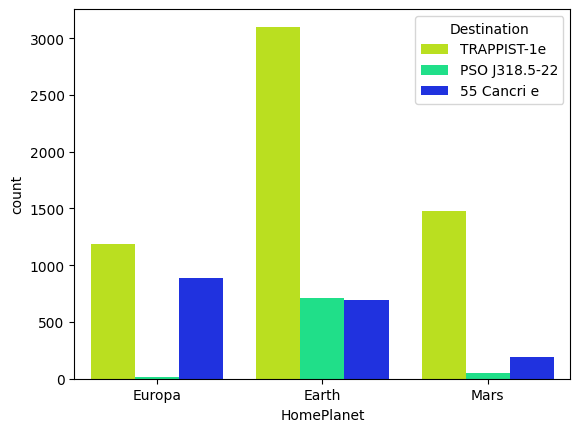

In [20]:
sns.countplot(data = df, x = 'HomePlanet',hue="Destination" , palette='gist_rainbow')

Home Planet VS VIP

<Axes: xlabel='HomePlanet', ylabel='count'>

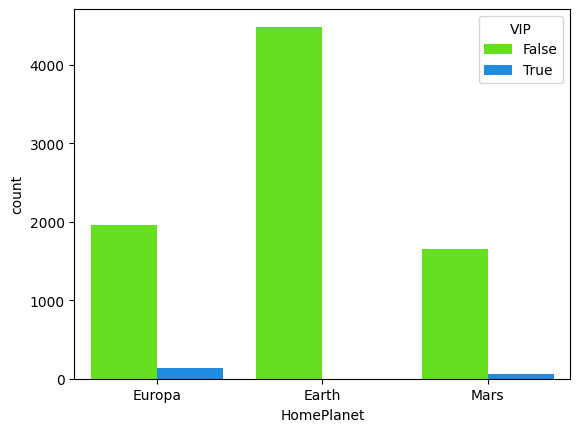

In [21]:
sns.countplot(data = df, x = 'HomePlanet',hue="VIP" , palette='gist_rainbow')

Destination VS CryoSleep

<Axes: xlabel='Destination', ylabel='count'>

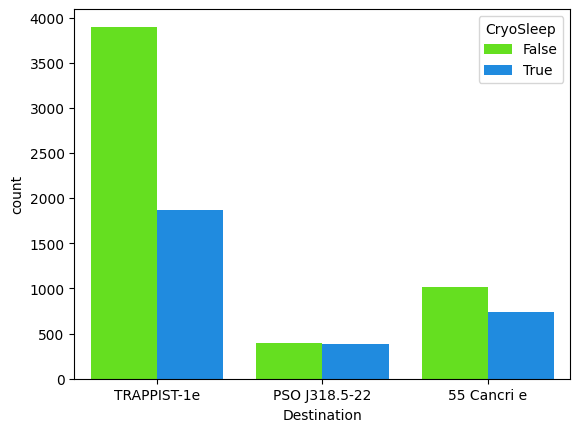

In [22]:
sns.countplot(data = df, x = 'Destination',hue="CryoSleep" , palette='gist_rainbow')

one categorical variable and one numerical variable

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


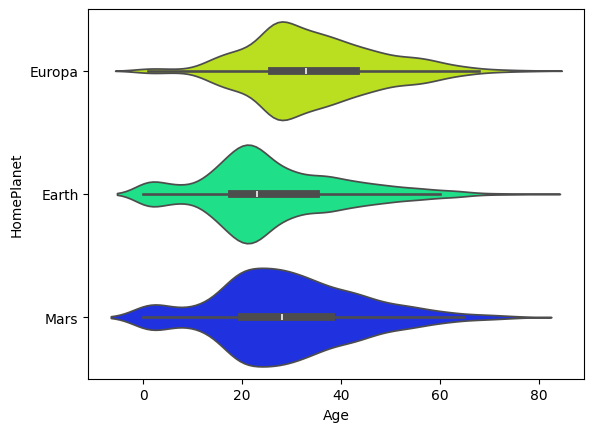

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


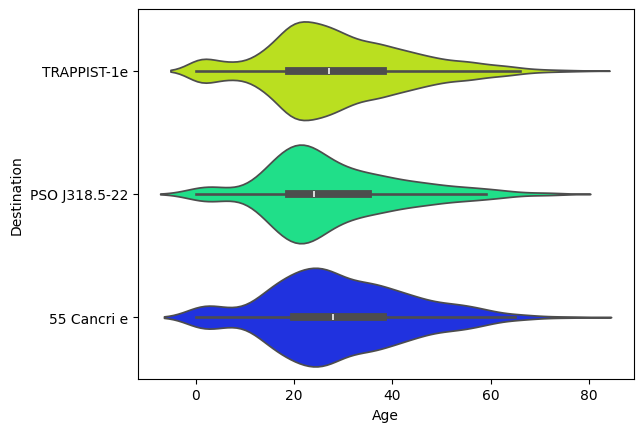

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


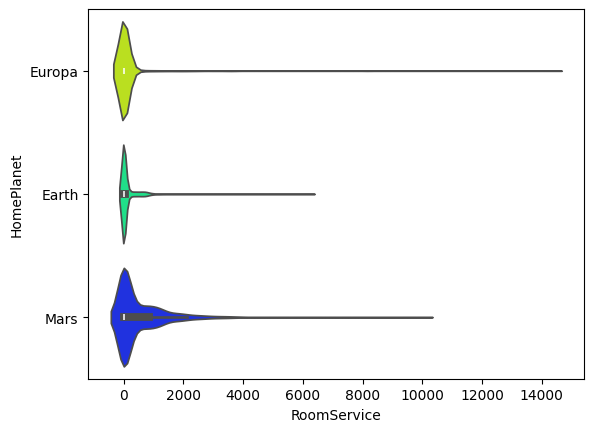

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


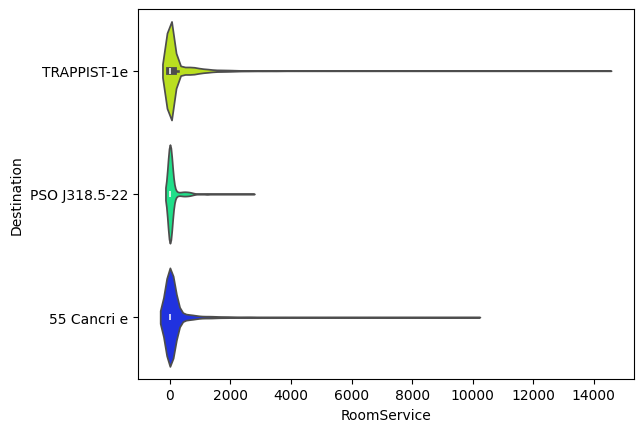

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


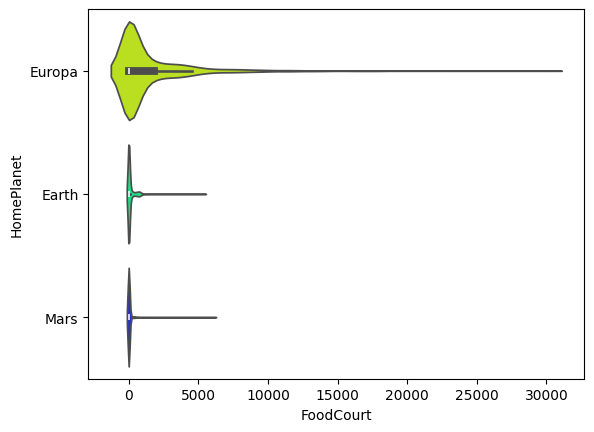

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


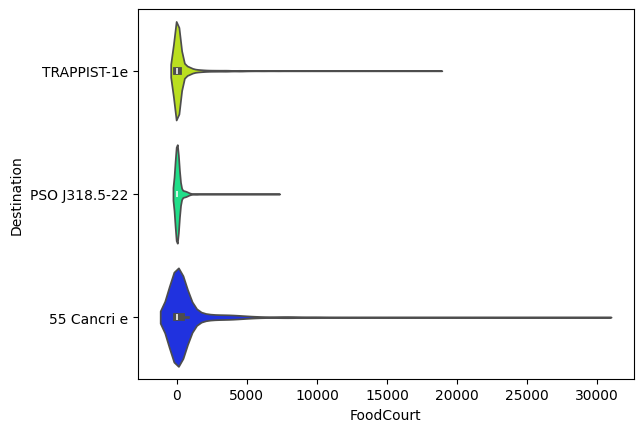

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


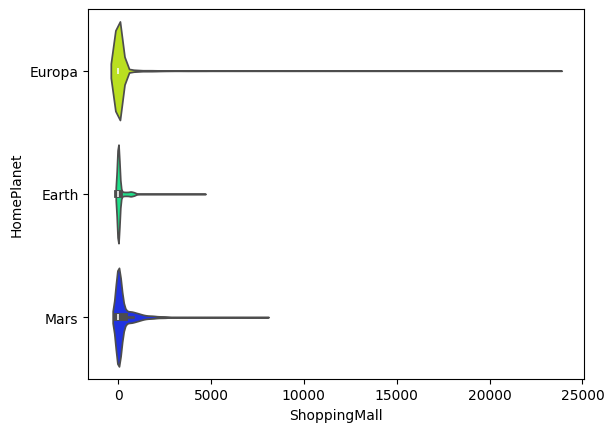

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


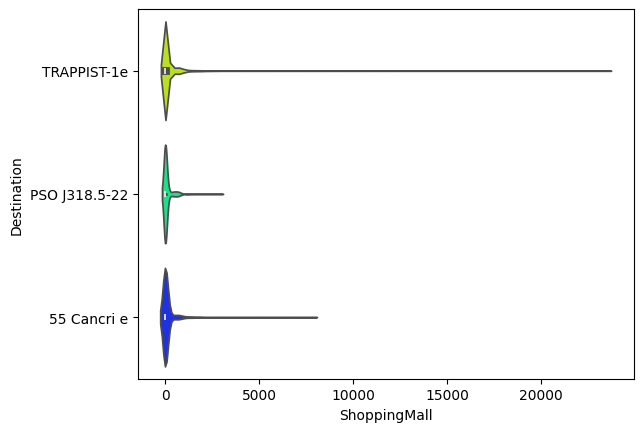

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


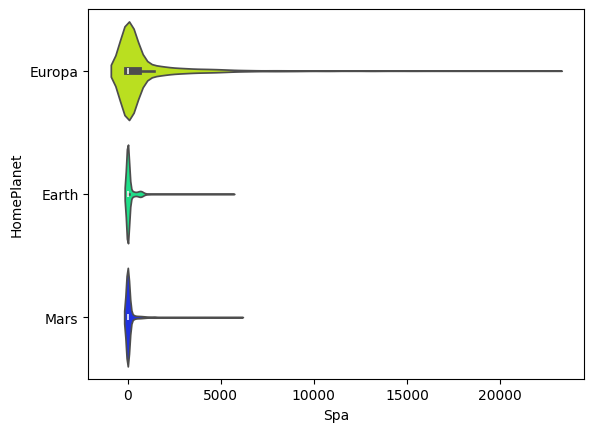

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


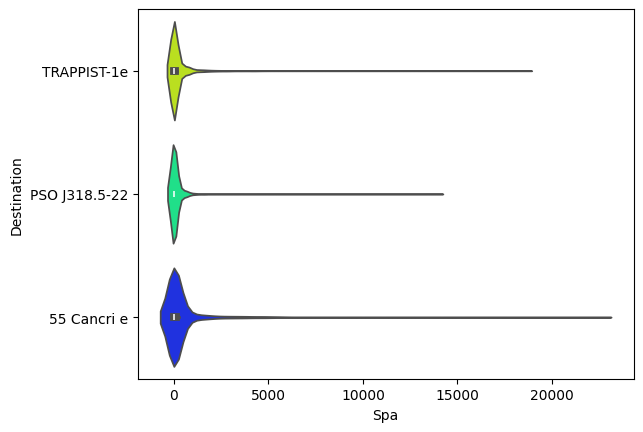

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


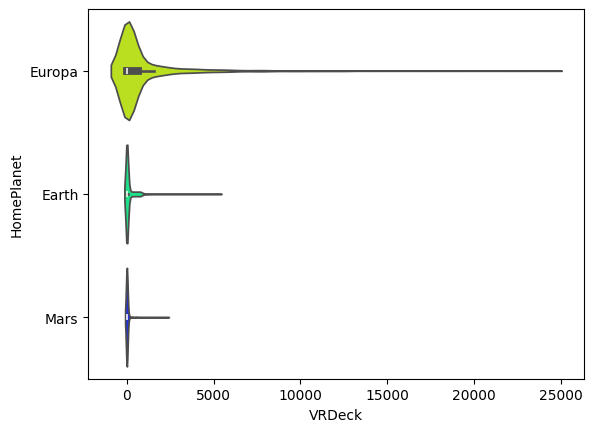

<ipython-input-23-578f530cf846>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')


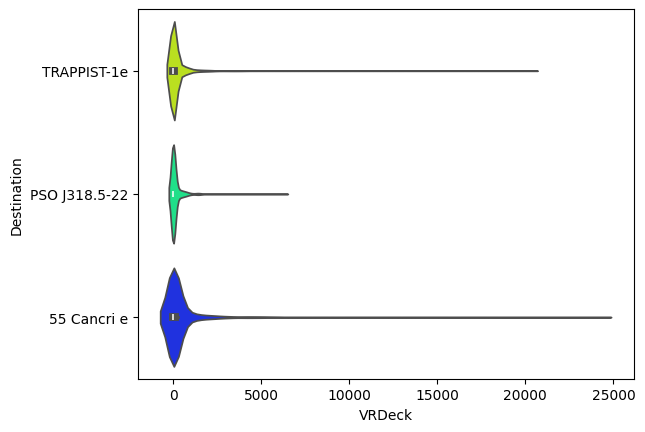

In [23]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] #numeric columns
cat_cols = ['HomePlanet', 'Destination']

for i in num_cols:
  for j in cat_cols:
    sns.violinplot(df, x=i, y=j, inner='box', palette='gist_rainbow')
    plt.show()

####Multivariate

creating a subset of dataframe in order to plot heatmap between numeric features

In [24]:
df_nums = df[num_cols]
df_nums.shape

(8693, 6)

<Axes: >

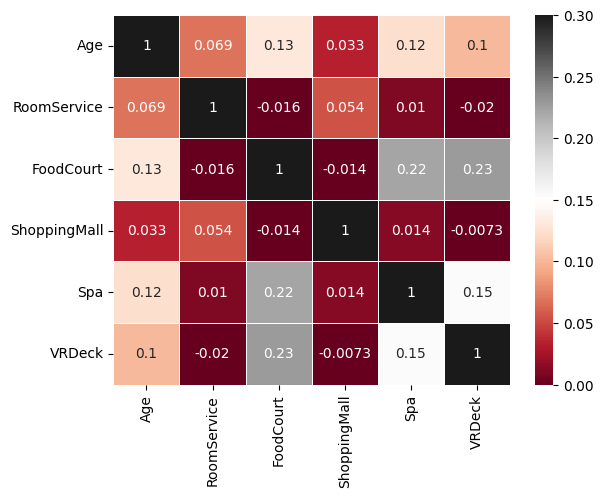

In [25]:
sns.heatmap(df_nums.corr(), cmap = 'RdGy',annot = True, linewidths=0.5, vmin=0, vmax=0.3, cbar=True)

### Missing values

In [26]:
#number of missing values for each feature
df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [27]:
df['nan_count'] = df.isnull().sum(axis=1).tolist()
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,nan_count
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0


In [28]:
df['nan_count'].value_counts()

nan_count
0    6923
1    1623
2     139
3       8
Name: count, dtype: int64

Every row with two or more null values gets deleted and the remaining null values will be imputed.

In [29]:
#we choose rows with 2 or more null values to delete
vals_to_del = [2, 3]
df = df[df.nan_count.isin(vals_to_del) == False]

In [30]:
df['nan_count'].value_counts()

nan_count
0    6923
1    1623
Name: count, dtype: int64

In [31]:
df = df.drop(['nan_count'], axis=1) #deleting this because we don't need it anymore

##Imputing missing values

In [32]:
df.isna().sum()

HomePlanet      174
CryoSleep       182
Destination     151
Age             155
VIP             171
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

for each feature we consider that feature as target and train our model using rest of features

In [33]:
df_impute = df.drop(['Transported'], axis=1)
df_impute = df_impute.dropna() #dropping null values
df_impute['CryoSleep'] = df_impute['CryoSleep'].astype(bool)
df_impute['VIP'] = df_impute['VIP'].astype(bool)
df_impute.shape

<ipython-input-33-822f2131742d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute['CryoSleep'] = df_impute['CryoSleep'].astype(bool)
<ipython-input-33-822f2131742d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute['VIP'] = df_impute['VIP'].astype(bool)


(6923, 10)

In [34]:
df_impute.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

###imputing HomePlanet

In [35]:
X_HomePlanet = df_impute.drop(['HomePlanet'], axis=1)
y_HomePlanet = df_impute['HomePlanet']

#one hot encoding categorical columns
X_HomePlanet = pd.get_dummies(X_HomePlanet, columns=['CryoSleep', 'Destination', 'VIP'])

#scaling dataset
SC = StandardScaler()
X_HomePlanet = SC.fit_transform(X_HomePlanet)
#train test split
X_HomePlanet_train, X_HomePlanet_test, y_HomePlanet_train, y_HomePlanet_test = train_test_split(X_HomePlanet,
                                                                                                y_HomePlanet,
                                                                                                random_state=42,
                                                                                                test_size=0.20,
                                                                                                shuffle=True)

#implementing model
RF_HomePlanet = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=42)
RF_HomePlanet.fit(X_HomePlanet_train, y_HomePlanet_train)
y_HomePlanet_predict = RF_HomePlanet.predict(X_HomePlanet_test)
accuracy_score(y_HomePlanet_test, y_HomePlanet_predict)

0.768231046931408

In [36]:
#creating a new dataframe to select where "HomePlanet" is null
df1 = df
df1 = df1[df1['HomePlanet'].isnull()]

#Selecting a subset as data to train model
df1_data = df1.drop(['Transported', 'HomePlanet'], axis=1)

df1_data = pd.get_dummies(df1_data, columns=['CryoSleep', 'Destination', 'VIP'])

df1_data = SC.fit_transform(df1_data)
df1['Predict_HomePlanet'] = RF_HomePlanet.predict(df1_data)

df1 = df1.drop(['HomePlanet'], axis=1) #removing HomePlanet because it contains null values
df1.rename(columns = {'Predict_HomePlanet':'HomePlanet'}, inplace = True) #renaming Predicted column as origial column

#merging two dataframe so we'll have a new fixed dataframe where null values of "HomePlanet" are imputed
df = df.dropna(subset=['HomePlanet'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)

#checking if all null values of "HomePlanet" are imputed or not
df.isna().sum()

<ipython-input-36-afb08fac8dfc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_HomePlanet'] = RF_HomePlanet.predict(df1_data)


HomePlanet        0
CryoSleep       182
Destination     151
Age             155
VIP             171
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###imputing CryoSleep

In [37]:
X_CryoSleep = df_impute.drop(['CryoSleep'], axis=1)
y_CryoSleep = df_impute['CryoSleep']
X_CryoSleep = pd.get_dummies(X_CryoSleep, columns=['HomePlanet', 'Destination', 'VIP'])
SC = StandardScaler()
X_CryoSleep = SC.fit_transform(X_CryoSleep)
X_CryoSleep_train, X_CryoSleep_test, y_CryoSleep_train, y_CryoSleep_test = train_test_split(X_CryoSleep,
                                                                                            y_CryoSleep,
                                                                                            random_state=42,
                                                                                            test_size=0.20,
                                                                                            shuffle=True)
model_CryoSleep = XGBClassifier(learning_rate=0.01, max_depth=0, reg_lambda=0.1, alpha=0.1)
model_CryoSleep.fit(X_CryoSleep_train, y_CryoSleep_train)
y_CryoSleep_predict = model_CryoSleep.predict(X_CryoSleep_test)
accuracy_score(y_CryoSleep_test, y_CryoSleep_predict)

0.9451263537906137

In [38]:
df1 = df
df1 = df1[df1['CryoSleep'].isnull()]
df1_data = df1.drop(['Transported', 'CryoSleep'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_CryoSleep'] = model_CryoSleep.predict(df1_data)
df1 = df1.drop(['CryoSleep'], axis=1) #removing CryoSleep because it contains null values
df1.rename(columns = {'Predict_CryoSleep':'CryoSleep'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['CryoSleep'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-38-146fce4ae567>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_CryoSleep'] = model_CryoSleep.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination     151
Age             155
VIP             171
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing VIP

In [39]:
X_VIP = df_impute.drop(['VIP'], axis=1)
y_VIP = df_impute['VIP']
X_VIP = pd.get_dummies(X_VIP, columns=['HomePlanet', 'CryoSleep', 'Destination'])
SC = StandardScaler()
X_VIP = SC.fit_transform(X_VIP)
X_VIP_train, X_VIP_test, y_VIP_train, y_VIP_test = train_test_split(X_VIP,
                                                                    y_VIP,
                                                                    random_state=42,
                                                                    test_size=0.20,
                                                                    shuffle=True)
model_VIP = XGBClassifier(learning_rate=0.01, max_depth=0, reg_lambda=0.1, alpha=0.1)
model_VIP.fit(X_VIP_train, y_VIP_train)
y_VIP_predict = model_VIP.predict(X_VIP_test)
accuracy_score(y_VIP_test, y_VIP_predict)

0.9812274368231046

In [40]:
df1 = df
df1 = df1[df1['VIP'].isnull()]
df1_data = df1.drop(['Transported', 'VIP'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_VIP'] = model_VIP.predict(df1_data)
df1 = df1.drop(['VIP'], axis=1) #removing VIP because it contains null values
df1.rename(columns = {'Predict_VIP':'VIP'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['VIP'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-40-e6ce148a3801>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_VIP'] = model_VIP.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination     151
Age             155
VIP               0
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing Destination

In [41]:
X_Destination = df_impute.drop(['Destination'], axis=1)
y_Destination = df_impute['Destination']
X_Destination = pd.get_dummies(X_Destination, columns=['HomePlanet', 'CryoSleep', 'VIP'])
SC = StandardScaler()
X_Destination = SC.fit_transform(X_Destination)
X_Destination_train, X_Destination_test, y_Destination_train, y_Destination_test = train_test_split(X_Destination,
                                                                                                    y_Destination,
                                                                                                    random_state=42,
                                                                                                    test_size=0.20,
                                                                                                    shuffle=True)
model_Destination = LogisticRegression()
model_Destination.fit(X_Destination_train, y_Destination_train)
y_Destination_predict = model_Destination.predict(X_Destination_test)
accuracy_score(y_Destination_test, y_Destination_predict)

0.6794223826714801

In [42]:
df.Destination.value_counts(normalize=True)

Destination
TRAPPIST-1e      0.695414
55 Cancri e      0.211197
PSO J318.5-22    0.093389
Name: proportion, dtype: float64

since choosing all values as "TRAPPIST-1e" will result in better accuracy so we fill all null values as "TRAPPIST-1e"

In [43]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             155
VIP               0
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing Age

In [44]:
X_Age = df_impute.drop(['Age'], axis=1)
y_Age = df_impute['Age']
X_Age = pd.get_dummies(X_Age, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_Age = SC.fit_transform(X_Age)
X_Age_train, X_Age_test, y_Age_train, y_Age_test = train_test_split(X_Age,
                                                                    y_Age,
                                                                    random_state=42,
                                                                    test_size=0.20,
                                                                    shuffle=True)
model_Age = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 42)
model_Age.fit(X_Age_train, y_Age_train)
y_Age_predict = model_Age.predict(X_Age_test)
r2_score(y_Age_test, y_Age_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.1962914120811593

In [45]:
df1 = df
df1 = df1[df1['Age'].isnull()]
df1_data = df1.drop(['Transported', 'Age'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_Age'] = model_Age.predict(df1_data)
df1 = df1.drop(['Age'], axis=1) #removing Age because it contains null values
df1.rename(columns = {'Predict_Age':'Age'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['Age'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df['Age'] = df['Age'].astype(int) #Age must be an integer number
df.isna().sum()

<ipython-input-45-b19a3c35f80e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_Age'] = model_Age.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     154
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing RoomService

In [46]:
X_RoomService = df_impute.drop(['RoomService'], axis=1)
y_RoomService = df_impute['RoomService']
X_RoomService = pd.get_dummies(X_RoomService, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_RoomService = SC.fit_transform(X_RoomService)
X_RoomService_train, X_RoomService_test, y_RoomService_train, y_RoomService_test = train_test_split(X_RoomService,
                                                                                                    y_RoomService,
                                                                                                    random_state=42,
                                                                                                    test_size=0.20,
                                                                                                    shuffle=True)
model_RoomService = XGBRegressor(objective ='reg:linear', n_estimators = 3, seed = 42)
model_RoomService.fit(X_RoomService_train, y_RoomService_train)
y_RoomService_predict = model_RoomService.predict(X_RoomService_test)
r2_score(y_RoomService_test, y_RoomService_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.18152522268810567

In [47]:
df1 = df
df1 = df1[df1['RoomService'].isnull()]
df1_data = df1.drop(['Transported', 'RoomService'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_RoomService'] = model_RoomService.predict(df1_data)
df1 = df1.drop(['RoomService'], axis=1) #removing RoomService because it contains null values
df1.rename(columns = {'Predict_RoomService':'RoomService'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['RoomService'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-47-1d764d76803e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_RoomService'] = model_RoomService.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       151
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing FoodCourt

In [48]:
X_FoodCourt = df_impute.drop(['FoodCourt'], axis=1)
y_FoodCourt = df_impute['FoodCourt']
X_FoodCourt = pd.get_dummies(X_FoodCourt, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_FoodCourt = SC.fit_transform(X_FoodCourt)
X_FoodCourt_train, X_FoodCourt_test, y_FoodCourt_train, y_FoodCourt_test = train_test_split(X_FoodCourt,
                                                                                            y_FoodCourt,random_state=42,
                                                                                            test_size=0.20,
                                                                                            shuffle=True)
model_FoodCourt = XGBRegressor(objective ='reg:linear', n_estimators = 4, seed = 42)
model_FoodCourt.fit(X_FoodCourt_train, y_FoodCourt_train)
y_FoodCourt_predict = model_FoodCourt.predict(X_FoodCourt_test)
r2_score(y_FoodCourt_test, y_FoodCourt_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.3509428803701048

In [49]:
df1 = df
df1 = df1[df1['FoodCourt'].isnull()]
df1_data = df1.drop(['Transported', 'FoodCourt'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_FoodCourt'] = model_FoodCourt.predict(df1_data)
df1 = df1.drop(['FoodCourt'], axis=1) #removing FoodCourt because it contains null values
df1.rename(columns = {'Predict_FoodCourt':'FoodCourt'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['FoodCourt'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-49-0b0f91fa57fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_FoodCourt'] = model_FoodCourt.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall    168
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing ShoppingMall

In [50]:
X_ShoppingMall = df_impute.drop(['ShoppingMall'], axis=1)
y_ShoppingMall = df_impute['ShoppingMall']
X_ShoppingMall = pd.get_dummies(X_ShoppingMall, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_ShoppingMall = SC.fit_transform(X_ShoppingMall)
X_ShoppingMall_train, X_ShoppingMall_test, y_ShoppingMall_train, y_ShoppingMall_test = train_test_split(X_ShoppingMall,
                                                                                                        y_ShoppingMall,random_state=42,
                                                                                                        test_size=0.20,
                                                                                                        shuffle=True)
model_ShoppingMall = XGBRegressor(objective='reg:linear', n_estimators=10, seed=42)
model_ShoppingMall.fit(X_ShoppingMall_train, y_ShoppingMall_train)
y_ShoppingMall_predict = model_ShoppingMall.predict(X_ShoppingMall_test)
r2_score(y_ShoppingMall_test, y_ShoppingMall_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.246017613457294

In [51]:
df1 = df
df1 = df1[df1['ShoppingMall'].isnull()]
df1_data = df1.drop(['Transported', 'ShoppingMall'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_ShoppingMall'] = model_ShoppingMall.predict(df1_data)
df1 = df1.drop(['ShoppingMall'], axis=1) #removing ShoppingMall because it contains null values
df1.rename(columns = {'Predict_ShoppingMall':'ShoppingMall'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['ShoppingMall'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-51-2cc3477284b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_ShoppingMall'] = model_ShoppingMall.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             159
VRDeck          158
Transported       0
dtype: int64

###Imputing Spa

In [52]:
X_Spa = df_impute.drop(['Spa'], axis=1)
y_Spa = df_impute['Spa']
X_Spa = pd.get_dummies(X_Spa, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_Spa = SC.fit_transform(X_Spa)
X_Spa_train, X_Spa_test, y_Spa_train, y_Spa_test = train_test_split(X_Spa,
                                                                    y_Spa,
                                                                    random_state=42,
                                                                    test_size=0.20,
                                                                    shuffle=True)
model_Spa = XGBRegressor(objective='reg:linear', n_estimators=5, seed=42)
model_Spa.fit(X_Spa_train, y_Spa_train)
y_Spa_predict = model_Spa.predict(X_Spa_test)
r2_score(y_Spa_test, y_Spa_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.22152755904243593

In [53]:
df1 = df
df1 = df1[df1['Spa'].isnull()]
df1_data = df1.drop(['Transported', 'Spa'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_Spa'] = model_Spa.predict(df1_data)
df1 = df1.drop(['Spa'], axis=1) #removing Spa because it contains null values
df1.rename(columns = {'Predict_Spa':'Spa'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['Spa'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-53-55005bb82d3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_Spa'] = model_Spa.predict(df1_data)


HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck          158
Transported       0
dtype: int64

###Imputing VRDeck

In [54]:
X_VRDeck = df_impute.drop(['VRDeck'], axis=1)
y_VRDeck = df_impute['VRDeck']
X_VRDeck = pd.get_dummies(X_VRDeck, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
SC = StandardScaler()
X_VRDeck = SC.fit_transform(X_VRDeck)
X_VRDeck_train, X_VRDeck_test, y_VRDeck_train, y_VRDeck_test = train_test_split(X_VRDeck,
                                                                                y_VRDeck,
                                                                                random_state=42,
                                                                                test_size=0.20,
                                                                                shuffle=True)
model_VRDeck = XGBRegressor(objective='reg:linear', n_estimators=3, seed=42)
model_VRDeck.fit(X_VRDeck_train, y_VRDeck_train)
y_VRDeck_predict = model_VRDeck.predict(X_VRDeck_test)
r2_score(y_VRDeck_test, y_VRDeck_predict)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:05:29] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.2022026473003541

In [55]:
df1 = df
df1 = df1[df1['VRDeck'].isnull()]
df1_data = df1.drop(['Transported', 'VRDeck'], axis=1)
df1_data = pd.get_dummies(df1_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
df1_data = SC.fit_transform(df1_data)
df1['Predict_VRDeck'] = model_VRDeck.predict(df1_data)
df1 = df1.drop(['VRDeck'], axis=1) #removing VRDeck because it contains null values
df1.rename(columns = {'Predict_VRDeck':'VRDeck'}, inplace = True) #renaming Predicted column as origial column
df = df.dropna(subset=['VRDeck'])
df = pd.concat([df, df1], axis=0)
df = df.sort_index(axis=0)
df.isna().sum()

<ipython-input-55-4de292e7b5d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predict_VRDeck'] = model_VRDeck.predict(df1_data)


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

##Training Models

In [56]:
X = df.drop(['Transported'], axis=1)
y = df['Transported']
X = pd.get_dummies(X, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])
X = SC.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20,
                                                    shuffle=True)

###Logistic Regression

In [57]:
model_select_LR = pd.DataFrame(columns = ['C', 'L1', 'Accuracy'])
Cs = [0.01,0.1,1,10,100]
L1s = [0,0.25,0.5,0.75,1]
for i in Cs:
  for j in L1s:
    model_LR = LogisticRegression(penalty='elasticnet', C=i, random_state=42, solver='saga', l1_ratio=j)
    model_LR.fit(X_train, y_train)
    y_predict_LR = model_LR.predict(X_test)
    score_LR = accuracy_score(y_test, y_predict_LR)
    model_select_LR.loc[len(model_select_LR.index)] = [i, j, score_LR]

model_select_LR = model_select_LR.sort_values(by=['Accuracy'], ascending=False)
print("for best Logistic Regression model hyperparameters are:\nC={}\nL1={}\nAccuracy={}".format(model_select_LR.iloc[0,0], model_select_LR.iloc[0,1], model_select_LR.iloc[0,2]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


for best Logistic Regression model hyperparameters are:
C=0.1
L1=1.0
Accuracy=0.795906432748538


### KNN

In [58]:
model_select_KNN = pd.DataFrame(columns=['n_neighbors', 'weights', 'Accuracy'])
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,30]
weights = ['uniform', 'distance']

for i in n_neighbors:
  for j in weights:
    model_KNN = KNeighborsClassifier(n_neighbors=i, weights=j)
    model_KNN.fit(X_train, y_train)
    y_predict_KNN = model_KNN.predict(X_test)
    score_KNN = accuracy_score(y_test, y_predict_KNN)
    model_select_KNN.loc[len(model_select_KNN.index)] = [i, j, score_KNN]

model_select_KNN = model_select_KNN.sort_values(by=['Accuracy'], ascending=False)
print("for best KNN model hyperparameters are:\nneighbors={}\nweights={}\nAccuracy={}".format(model_select_KNN.iloc[0,0], model_select_KNN.iloc[0,1], model_select_KNN.iloc[0,2]))


for best KNN model hyperparameters are:
neighbors=25
weights=uniform
Accuracy=0.7859649122807018


###SVM

In [59]:
model_select_SVM = pd.DataFrame(columns=['C', 'kernel', 'Accuracy'])
C_values = [0.01,0.1,1,10,100]
kernels = ['linear', 'rbf']  # Try different kernel functions

for i in C_values:
  for j in kernels:
    model_SVM = SVC(C=i, kernel=j, random_state=42)  # Create SVC model with hyperparameters
    model_SVM.fit(X_train, y_train)
    y_predict_SVM = model_SVM.predict(X_test)
    score_SVM = accuracy_score(y_test, y_predict_SVM)
    model_select_SVM.loc[len(model_select_SVM.index)] = [i, j, score_SVM]

model_select_SVM = model_select_SVM.sort_values(by=['Accuracy'], ascending=False)
print("for best SVM model hyperparameters are:\nC={}\nkernel={}\nAccuracy={}".format(model_select_SVM.iloc[0,0], model_select_SVM.iloc[0,1], model_select_SVM.iloc[0,2]))

for best SVM model hyperparameters are:
C=100.0
kernel=linear
Accuracy=0.7900584795321638


###Poly SVM

In [60]:
model_select_poly_SVM = pd.DataFrame(columns=['C', 'kernel', 'Accuracy'])
C_values = [0.01,0.1,1,10,100]
degrees = [2,3]

for i in C_values:
  for j in degrees:
    model_poly_SVM = SVC(C=i, kernel='poly', degree = j, random_state=42)
    model_poly_SVM.fit(X_train, y_train)
    y_predict_poly_SVM = model_poly_SVM.predict(X_test)
    score_poly_SVM = accuracy_score(y_test, y_predict_poly_SVM)
    model_select_poly_SVM.loc[len(model_select_poly_SVM.index)] = [i, j, score_poly_SVM]

model_select_poly_SVM = model_select_poly_SVM.sort_values(by=['Accuracy'], ascending=False)
print("for best poly SVM model hyperparameters are:\nC={}\ndegree={}\nAccuracy={}".format(model_select_poly_SVM.iloc[0,0], model_select_poly_SVM.iloc[0,1], model_select_poly_SVM.iloc[0,2]))

for best poly SVM model hyperparameters are:
C=100.0
degree=2.0
Accuracy=0.7906432748538011


###Decision Tree

In [61]:
model_select_DT = pd.DataFrame(columns=['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'Accuracy'])
criterion = ['gini', 'entropy']
max_depth = [None,3,5,7,10]
min_samples_split = [2,5]
min_samples_leaf = [1,2,5]
max_features = [None, 'sqrt', 'log2']

for i in criterion:
  for j in max_depth:
    for k in min_samples_split:
      for t in min_samples_leaf:
        for w in max_features:
          model_DT = DecisionTreeClassifier(criterion=i,
                                            max_depth=j,
                                            min_samples_split=k,
                                            min_samples_leaf=t,
                                            max_features=w,
                                            random_state=42)
          model_DT.fit(X_train, y_train)
          y_predict_DT = model_DT.predict(X_test)
          score_DT = accuracy_score(y_test, y_predict_DT)
          model_select_DT.loc[len(model_select_DT.index)] = [i, j, k, t, w, score_DT]

model_select_DT = model_select_DT.sort_values(by=['Accuracy'], ascending=False)
print("for best Decision Tree model hyperparameters are:\ncriterion={}\nmax_depth={}\nmin_samples_split={}\nmin_samples_leaf={}\nmax_features={}\nAccuracy={}".format(model_select_DT.iloc[0,0],
                                                                                    model_select_DT.iloc[0,1],
                                                                                    model_select_DT.iloc[0,2],
                                                                                    model_select_DT.iloc[0,3],
                                                                                    model_select_DT.iloc[0,4],
                                                                                    model_select_DT.iloc[0,5]))

for best Decision Tree model hyperparameters are:
criterion=gini
max_depth=10
min_samples_split=5
min_samples_leaf=2
max_features=None
Accuracy=0.7883040935672515


###Random Forest

In [62]:
model_select_RF = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'n_estimator', 'Accuracy'])
max_depth = [None, 3, 6, 9, 12]
min_samples_split = [2,3,5,7]
min_samples_leaf = [1,2,3]
n_estimators = list(range(20,55,5))

for i in max_depth:
  for j in min_samples_split:
    for k in min_samples_leaf:
      for t in n_estimators:
        model_RF = RandomForestClassifier(criterion='gini',
                                            max_depth=i,
                                            min_samples_split=j,
                                            min_samples_leaf=k,
                                            n_estimators=t,
                                            random_state=42)
        model_RF.fit(X_train, y_train)
        y_predict_RF = model_RF.predict(X_test)
        score_RF = accuracy_score(y_test, y_predict_RF)
        model_select_RF.loc[len(model_select_RF.index)] = [i, j, k, t, score_RF]

model_select_RF = model_select_RF.sort_values(by=['Accuracy'], ascending=False)
print("for best Random Forest model hyperparameters are:\nmax_depth={}\nmin_samples_split={}\nmin_samples_leaf={}\nestimators={}\nAccuracy={}".format(model_select_RF.iloc[0,0],
                                                                                               model_select_RF.iloc[0,1],
                                                                                               model_select_RF.iloc[0,2],
                                                                                               model_select_RF.iloc[0,3],
                                                                                               model_select_RF.iloc[0,4]))


for best Random Forest model hyperparameters are:
max_depth=12.0
min_samples_split=7.0
min_samples_leaf=2.0
estimators=25.0
Accuracy=0.8111111111111111


###AdaBoost

In [63]:
model_select_Ada = pd.DataFrame(columns = ['n_estimator', 'Learning_rate', 'Accuracy'])
n_estimators = list(range(75,130,5))
Learning_rates = list(np.arange(0.4,0.6,0.01))
for i in n_estimators:
  for j in Learning_rates:
    model_Ada = AdaBoostClassifier(n_estimators=i, learning_rate=j, random_state=42)
    model_Ada.fit(X_train, y_train)
    y_predict_Ada = model_Ada.predict(X_test)
    score_Ada = accuracy_score(y_test, y_predict_Ada)
    model_select_Ada.loc[len(model_select_Ada.index)] = [i, j, score_Ada]

model_select_Ada = model_select_Ada.sort_values(by=['Accuracy'], ascending=False)
print("for best AdaBoost model hyperparameters are:\nn_estimators={}\nLearning_rates={}\nAccuracy={}".format(model_select_Ada.iloc[0,0], model_select_Ada.iloc[0,1], model_select_Ada.iloc[0,2]))

for best AdaBoost model hyperparameters are:
n_estimators=100.0
Learning_rates=0.5500000000000002
Accuracy=0.8052631578947368


###Gradient Boosting

In [64]:
model_select_GB = pd.DataFrame(columns = ['n_estimators',
                                          'Learning_rate',
                                          'min_samples_split',
                                          'min_samples_leaf',
                                          'max_depth',
                                          'Accuracy'])
n_estimators = list(range(10,70,10))
Learning_rates = list(np.arange(0.1,0.32,0.02))
min_samples_splits = [2,3]
min_samples_leafs = [1,2]
max_depths = [None, 3, 5, 7]


for i in n_estimators:
  for j in Learning_rates:
    for k in min_samples_splits:
      for t in min_samples_leafs:
        for w in max_depths:
          model_GB = GradientBoostingClassifier(n_estimators=i,
                                                learning_rate=j,
                                                min_samples_split=k,
                                                min_samples_leaf=t,
                                                max_depth=w,
                                                random_state=42)
          model_GB.fit(X_train, y_train)
          y_predict_GB = model_GB.predict(X_test)
          score_GB = accuracy_score(y_test, y_predict_GB)
          model_select_GB.loc[len(model_select_GB.index)] = [i, j, k, t, w, score_GB]

model_select_GB = model_select_GB.sort_values(by=['Accuracy'], ascending=False)
print("for best Gradient Boosting model, hyperparameters are:")
print("n_estimators: {}".format(model_select_GB.iloc[0,0]))
print("learning_rate: {}".format(model_select_GB.iloc[0,1]))
print("min_samples_split: {}".format(model_select_GB.iloc[0,2]))
print("min_samples_leaf: {}".format(model_select_GB.iloc[0,3]))
print("max_depths: {}".format(model_select_GB.iloc[0,4]))
print("Accuracy is: {}".format(model_select_GB.iloc[0,5]))


for best Gradient Boosting model, hyperparameters are:
n_estimators: 50.0
learning_rate: 0.22000000000000003
min_samples_split: 3.0
min_samples_leaf: 1.0
max_depths: 3.0
Accuracy is: 0.8116959064327486


###Histogram-based Gradient Boosting

In [65]:
model_select_HGB = pd.DataFrame(columns = ['Learning_rate', 'l2_regularization', 'Accuracy'])
Learning_rates = list(np.arange(0.15,0.26,0.01))
l2_regularizations = list(range(10,120,10))
for i in Learning_rates:
  for j in l2_regularizations:
    model_HGB = HistGradientBoostingClassifier(learning_rate=i, l2_regularization=j, random_state=42)
    model_HGB.fit(X_train, y_train)
    y_predict_HGB = model_HGB.predict(X_test)
    score_HGB = accuracy_score(y_test, y_predict_HGB)
    model_select_HGB.loc[len(model_select_HGB.index)] = [i, j, score_HGB]

model_select_HGB = model_select_HGB.sort_values(by=['Accuracy'], ascending=False)
print("for best Histogram-based Gradient Boosting model hyperparameters are:\nLearning_rate={}\nl2_regularization={}\nAccuracy={}".format(model_select_HGB.iloc[0,0], model_select_HGB.iloc[0,1], model_select_HGB.iloc[0,2]))

for best Histogram-based Gradient Boosting model hyperparameters are:
Learning_rate=0.24000000000000007
l2_regularization=60.0
Accuracy=0.8140350877192982


###XGBoost

In [66]:
model_select_XGB = pd.DataFrame(columns = ['Learning_rate', 'n_estimators', 'max_depth', 'Accuracy'])
Learning_rates = list(np.arange(0.1,0.5,0.025))
n_estimators = list(range(20,130,10))
max_depths = [0, 3, 6, 9]

for i in Learning_rates:
  for j in n_estimators:
    for k in max_depths:
      model_XGB = XGBClassifier(learning_rate=i, n_estimators=j, max_depth=k, objective='binary:logistic')
      model_XGB.fit(X_train, y_train)
      y_predict_XGB = model_XGB.predict(X_test)
      score_XGB = accuracy_score(y_test, y_predict_XGB)
      model_select_XGB.loc[len(model_select_XGB.index)] = [i, j, k, score_XGB]

model_select_XGB = model_select_XGB.sort_values(by=['Accuracy'], ascending=False)
print("for best XGboost model hyperparameters are:\nLearning_rate={}\nn_estimators={}\nmax_depth={}\nAccuracy={}".format(model_select_XGB.iloc[0,0], model_select_XGB.iloc[0,1], model_select_XGB.iloc[0,2], model_select_XGB.iloc[0,3]))

for best XGboost model hyperparameters are:
Learning_rate=0.27499999999999997
n_estimators=50.0
max_depth=3.0
Accuracy=0.8122807017543859


now we choose best model among best model of AdaBoost, Random Forest, Gradient Boosting and Histogram-based Gradient Boosting and XGboost using parameters we found by hyperparameter tuning.<br>
or doing this we check classification report of each model

Random Forest

In [67]:
model_final_RF = RandomForestClassifier(criterion='gini',
                                            max_depth=12,
                                            min_samples_split=7,
                                            min_samples_leaf=2,
                                            n_estimators=25,
                                            random_state=42)
model_final_RF.fit(X_train, y_train)
y_predict_final_RF = model_final_RF.predict(X_test)
print(classification_report(y_test,y_predict_final_RF))

              precision    recall  f1-score   support

       False       0.83      0.78      0.80       849
        True       0.79      0.85      0.82       861

    accuracy                           0.81      1710
   macro avg       0.81      0.81      0.81      1710
weighted avg       0.81      0.81      0.81      1710



AdaBoost

In [68]:
model_final_Ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.55, random_state=42)
model_final_Ada.fit(X_train, y_train)
y_predict_final_Ada = model_final_Ada.predict(X_test)
print(classification_report(y_test,y_predict_final_Ada))

              precision    recall  f1-score   support

       False       0.82      0.78      0.80       849
        True       0.79      0.83      0.81       861

    accuracy                           0.81      1710
   macro avg       0.81      0.81      0.81      1710
weighted avg       0.81      0.81      0.81      1710



Gradient Boosting

In [69]:
model_final_GB = GradientBoostingClassifier(n_estimators=50,
                                      learning_rate=0.22,
                                      min_samples_split=3,
                                      min_samples_leaf=1,
                                      max_depth=3,
                                      random_state=42)
model_final_GB.fit(X_train, y_train)
y_predict_final_GB = model_final_GB.predict(X_test)
print(classification_report(y_test,y_predict_final_GB))

              precision    recall  f1-score   support

       False       0.84      0.76      0.80       849
        True       0.79      0.86      0.82       861

    accuracy                           0.81      1710
   macro avg       0.81      0.81      0.81      1710
weighted avg       0.81      0.81      0.81      1710



Histogram-based Gradient Boosting

In [70]:
model_final_HGB = HistGradientBoostingClassifier(learning_rate=0.24, l2_regularization=60, random_state=42)
model_final_HGB.fit(X_train, y_train)
y_predict_final_HGB = model_final_HGB.predict(X_test)
print(classification_report(y_test,y_predict_final_HGB))

              precision    recall  f1-score   support

       False       0.83      0.79      0.81       849
        True       0.80      0.84      0.82       861

    accuracy                           0.81      1710
   macro avg       0.81      0.81      0.81      1710
weighted avg       0.81      0.81      0.81      1710



XGBoost

In [71]:
model_final_XGB = XGBClassifier(learning_rate=0.275, n_estimators=50, max_depth=3, objective='binary:logistic')
model_final_XGB.fit(X_train, y_train)
y_predict_final_XGB = model_final_XGB.predict(X_test)
print(classification_report(y_test,y_predict_final_XGB))

              precision    recall  f1-score   support

       False       0.85      0.76      0.80       849
        True       0.79      0.86      0.82       861

    accuracy                           0.81      1710
   macro avg       0.82      0.81      0.81      1710
weighted avg       0.82      0.81      0.81      1710



finally it's revealed Histogram-based Gradient Boosting with learning rate=0.24 and l2 regularization of 60 is best possible choice

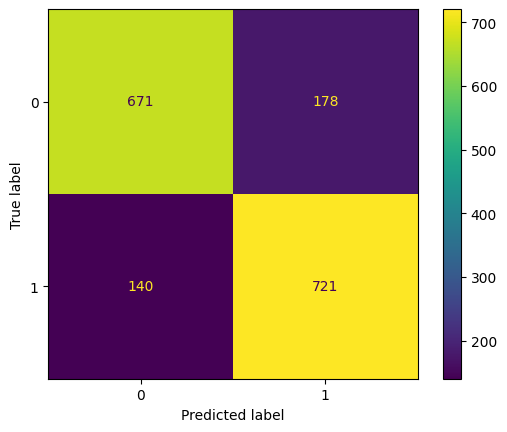

In [72]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_predict_final_HGB)).plot()